# EDA for stress levels


In [197]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # pandas dataframe
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
garmin_base_dir = "../files/Garmin_20241403/DI_CONNECT"

# Building the health DataFrames

Combine json files into dataframes of healh data 
- Garmin daily health data files can be found in the Garmin-folder DI_CONNECT/DI-Connect-Aggregator, which contains json files starting with UDS.
- remove data from before 2020 (no watch), but there are some weird data rows?
- Also wellness data in DI_CONNECT/DI-Connect-Wellness

- Avtivities?

In [252]:
# Files
#  DI-Connect-Aggregator
#  DI-Connect-Welness
# Find activities?

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(base, file, substr, start_year=2020):
    all_dfs = []
    path = os.path.join(base, file)
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.endswith('.json') and substr in f]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        full_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year]#, columns_of_interest]
        return full_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded




# DataFrames from json-files, combined
aggregator_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Aggregator", 'UDS')
wellness_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Wellness", 'sleepData')

#df.loc[df['column_name'] == some_value]

In [253]:
#print(aggregator_df.columns)
aggregator_df.head()

,userProfilePK,calendarDate,uuid,durationInMilliseconds,consumedKilocalories,remainingKilocalories,includesCalorieConsumedData,allDayStress,version,totalKilocalories,activeKilocalories,burnedKilocalories,totalDistanceMeters,includesWellnessData,includesActivityData,bmrKilocalories,wellnessKilocalories,wellnessTotalKilocalories,wellnessActiveKilocalories,totalSteps,dailyStepGoal,wellnessDistanceMeters,wellnessStartTimeGmt,wellnessEndTimeGmt,wellnessStartTimeLocal,wellnessEndTimeLocal,highlyActiveSeconds,activeSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,floorsAscendedInMeters,floorsDescendedInMeters,userIntensityMinutesGoal,userFloorsAscendedGoal,minHeartRate,maxHeartRate,restingHeartRate,currentDayRestingHeartRate,restingHeartRateTimestamp,includesSingleMeasurement,includesContinuousMeasurement,includesAllDayPulseOx,includesSleepPulseOx,source,bodyBattery,minAvgHeartRate,maxAvgHeartRate,lowestSpo2Value,latestSpo2Value,latestSpo2ValueReadingTimeGmt,latestSpo2ValueReadingTimeLocal,hydration,respiration,averageSpo2Value,netCalorieGoal,dailyTotalFromEpochData,restingCaloriesFromActivity,isVigorousDay
14,86607424,2020-06-18,18de2ff7644a48d3bbc44785a8d746ad,86400000,NaN,1923.0,False,"{'userProfilePK': 86607424, 'calendarDate': '2...",74280002,1923.0,446.0,NaN,10037.0,True,True,1477.0,1923.0,1923.0,446.0,13987.0,10000.0,10037.0,2020-06-17T22:00:00.0,2020-06-18T22:00:00.0,2020-06-18T00:00:00.0,2020-06-19T00:00:00.0,7480.0,1476.0,11.0,0.0,47.313,41.145,180.0,10.0,64.0,128.0,68.0,68.0,1.592518e+12,True,False,False,False,0.0,"{'userProfilePK': 86607424, 'calendarDate': '2...",65.0,121.0,95.0,95.0,2020-06-18T20:14:00.0,2020-06-18T22:14:00.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2...",NaN,NaN,NaN,NaN,NaN
15,86607424,2020-06-19,94fe702aadb840e79b86f5e430e35880,86400000,NaN,1885.0,False,"{'userProfilePK': 86607424, 'calendarDate': '2...",63840002,1885.0,408.0,NaN,9329.0,True,True,1477.0,1885.0,1885.0,408.0,12455.0,10000.0,9329.0,2020-06-18T22:00:00.0,2020-06-19T22:00:00.0,2020-06-19T00:00:00.0,2020-06-20T00:00:00.0,5162.0,2430.0,2.0,10.0,31.366,76.475,180.0,10.0,55.0,160.0,64.0,59.0,1.592604e+12,True,False,True,False,0.0,"{'userProfilePK': 86607424, 'calendarDate': '2...",56.0,158.0,85.0,97.0,2020-06-19T22:00:00.0,2020-06-20T00:00:00.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2...",96.0,NaN,NaN,NaN,NaN
16,86607424,2020-06-20,734de901672a4d10834648af9183a61e,86400000,NaN,2456.0,False,"{'userProfilePK': 86607424, 'calendarDate': '2...",82320003,2456.0,975.0,NaN,21728.0,True,True,1481.0,2456.0,2456.0,975.0,26379.0,10000.0,21728.0,2020-06-19T22:00:00.0,2020-06-20T22:00:00.0,2020-06-20T00:00:00.0,2020-06-21T00:00:00.0,9014.0,2798.0,20.0,88.0,60.259,66.790,180.0,10.0,53.0,159.0,62.0,58.0,1.592690e+12,True,False,True,True,0.0,"{'userProfilePK': 86607424, 'calendarDate': '2...",54.0,156.0,84.0,94.0,2020-06-20T22:00:00.0,2020-06-21T00:00:00.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2...",93.0,NaN,NaN,NaN,NaN
17,86607424,2020-06-21,c9bc74c089fa4da0828eab3fe6a4f3cf,86400000,NaN,2202.0,False,"{'userProfilePK': 86607424, 'calendarDate': '2...",79980002,2202.0,734.0,NaN,31347.0,True,True,1468.0,2202.0,2202.0,734.0,12401.0,10000.0,8570.0,2020-06-20T22:00:00.0,2020-06-21T22:00:00.0,2020-06-21T00:00:00.0,2020-06-22T00:00:00.0,5280.0,2183.0,52.0,4.0,51.816,50.837,180.0,10.0,50.0,139.0,60.0,56.0,1.592777e+12,False,False,True,True,0.0,"{'userProfilePK': 86607424, 'calendarDate': '2...",52.0,134.0,91.0,99.0,2020-06-21T22:00:00.0,2020-06-22T00:00:00.0,"{'userProfilePK': 86607424, 'calendarDate': '2...","{'userProfilePK': 86607424, 'calendarDate': '2...",96.0,NaN,NaN,NaN,NaN
18,86607424,2020-06-22,c05f726134e841deb35f9d93ea065a46,86400000,NaN,2017.0,False,"{'userProfilePK': 86607424, 'calendarDate': '2...",51660002,2017.0,549.0,NaN,12634.0,True,True,1468.0,2017.0,2017.0,549.0,152

In [254]:
#wellness_df.head()

In [237]:
print(wellness_df.columns)
focus_columns_well = ['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
                     'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds','unmeasurableSeconds',
                     ]

Index(['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
       'sleepWindowConfirmationType', 'retro', 'deepSleepSeconds',
       'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds',
       'unmeasurableSeconds', 'averageRespiration', 'lowestRespiration',
       'highestRespiration', 'spo2SleepSummary', 'userProfilePk', 'notes',
       'reportTimestamp', 'ovulationDay', 'symptoms', 'moods', 'flow',
       'sexDrive', 'startDate', 'predictedPeriodLength', 'actualPeriodLength',
       'predictedCycleLength', 'actualCycleLength', 'hormonalContraception',
       'fertileWindowStart', 'fertileWindowLength', 'status',
       'hasLoggedOvulationDay', 'initialPredictedPeriodLength',
       'initialPredictedCycleLength', 'createTimestamp', 'cycleType',
       'applicableMenstrualCycleLength', 'applicablePeriodLength',
       'trainingMethod', 'zone1Floor', 'zone2Floor', 'zone3Floor',
       'zone4Floor', 'zone5Floor', 'maxHeartRateUsed',
       'restingHrAutoUpdateUsed'

In [225]:
focus_columns_agg = ['calendarDate', 'totalKilocalories', 'activeKilocalories', 'allDayStress', 
                       'includesWellnessData', 'includesActivityData',
                       'totalSteps', 'highlyActiveSeconds', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 
                       'highlyActiveSeconds', 'userIntensityMinutesGoal', 
                       'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'minAvgHeartRate', 'maxAvgHeartRate',
                       'bodyBattery','restingCaloriesFromActivity', 'isVigorousDay']

focus_agg_df = aggregator_df[aggregator_df["calendarDate"].isin(focusc_column_agg)]

#focus_agg_df =  aggregator_df.loc[aggregator_df['calendarDate'].dt.year<=2020, focus_columns_agg]
focus_agg_df

In [226]:
wellness_df.head()

""


In [180]:
focus_df[['allDayStress']].iat[0,0]['aggregatorList']
#focus_df[['bodyBattery']].iat[0,0]['bodyBatteryStatList']

[{'type': 'TOTAL',
  'averageStressLevel': 40,
  'averageStressLevelIntensity': 35,
  'maxStressLevel': 93,
  'stressIntensityCount': 376,
  'stressOffWristCount': 148,
  'stressTooActiveCount': 253,
  'totalStressCount': 777,
  'totalStressIntensity': -5086,
  'stressDuration': 15480,
  'restDuration': 7080,
  'activityDuration': 15180,
  'uncategorizedDuration': 8880,
  'totalDuration': 46620,
  'lowDuration': 7680,
  'mediumDuration': 7020,
  'highDuration': 780},
 {'type': 'AWAKE',
  'averageStressLevel': 40,
  'averageStressLevelIntensity': 35,
  'maxStressLevel': 93,
  'stressIntensityCount': 369,
  'stressOffWristCount': 119,
  'stressTooActiveCount': 253,
  'totalStressCount': 741,
  'totalStressIntensity': -5035,
  'stressDuration': 15120,
  'restDuration': 7020,
  'activityDuration': 15180,
  'uncategorizedDuration': 7140,
  'totalDuration': 44460,
  'lowDuration': 7320,
  'mediumDuration': 7020,
  'highDuration': 780},
 {'type': 'ASLEEP',
  'averageStressLevel': 31,
  'avera

In [154]:
def extract_stress_data(row):
    if isinstance(row, list) and row:  # Check if it's a list and not empty
        first_dict = row[0]  # Assuming you want the first dictionary
        return pd.Series({
            'AverageStressLevel': first_dict.get('averageStressLevel', None),
            'MaxStressLevel': first_dict.get('maxStressLevel', None)
        })
    else:
        return pd.Series({'AverageStressLevel': None, 'MaxStressLevel': None})


In [155]:
focus_df[['allDayStress']].iat[0,0]

{'userProfilePK': 86607424,
 'calendarDate': '2020-06-18',
 'aggregatorList': [{'type': 'TOTAL',
   'averageStressLevel': 40,
   'averageStressLevelIntensity': 35,
   'maxStressLevel': 93,
   'stressIntensityCount': 376,
   'stressOffWristCount': 148,
   'stressTooActiveCount': 253,
   'totalStressCount': 777,
   'totalStressIntensity': -5086,
   'stressDuration': 15480,
   'restDuration': 7080,
   'activityDuration': 15180,
   'uncategorizedDuration': 8880,
   'totalDuration': 46620,
   'lowDuration': 7680,
   'mediumDuration': 7020,
   'highDuration': 780},
  {'type': 'AWAKE',
   'averageStressLevel': 40,
   'averageStressLevelIntensity': 35,
   'maxStressLevel': 93,
   'stressIntensityCount': 369,
   'stressOffWristCount': 119,
   'stressTooActiveCount': 253,
   'totalStressCount': 741,
   'totalStressIntensity': -5035,
   'stressDuration': 15120,
   'restDuration': 7020,
   'activityDuration': 15180,
   'uncategorizedDuration': 7140,
   'totalDuration': 44460,
   'lowDuration': 732

In [156]:
import pandas as pd

def extract_stress_data(row):
    # Accessing the list of stress data segments
    aggregator_list = row.get('aggregatorList', [])
    
    # Find the dictionary in the list where 'type' is 'TOTAL'
    total_stress_data = next((item for item in aggregator_list if item['type'] == 'TOTAL'), None)
    
    # If found, extract the required data
    if total_stress_data:
        return pd.Series({
            'AverageStressLevel': total_stress_data.get('averageStressLevel', None),
            'MaxStressLevel': total_stress_data.get('maxStressLevel', None)
        })
    else:
        return pd.Series({'AverageStressLevel': None, 'MaxStressLevel': None})

# Apply the function to each row in the 'allDayStress' column
stress_metrics = focus_df['allDayStress'].apply(extract_stress_data)
focus_df = pd.concat([focus_df, stress_metrics], axis=1)


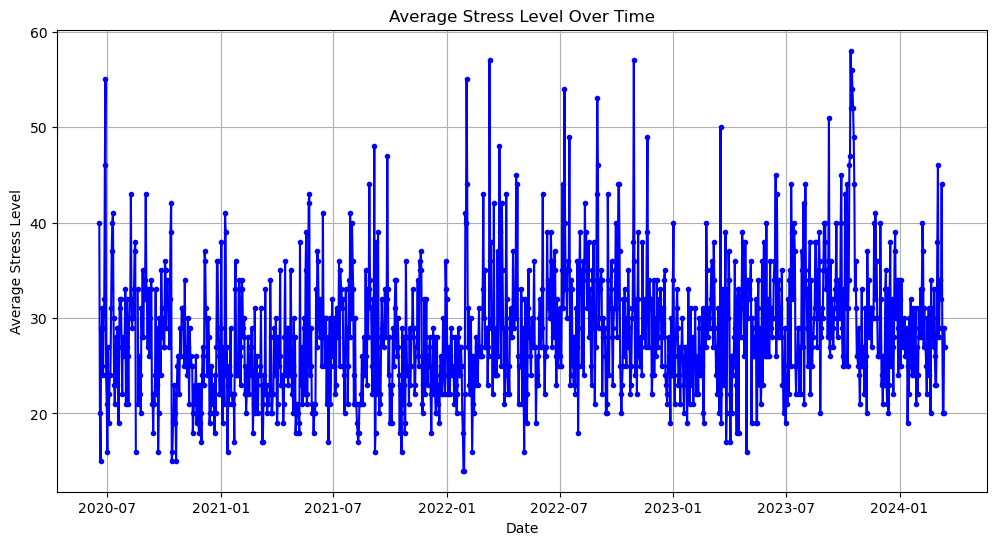

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(focus_df['calendarDate'], focus_df['AverageStressLevel'], marker='.', linestyle='-', color='b')
plt.title('Average Stress Level Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stress Level')
plt.grid(True)
plt.show()


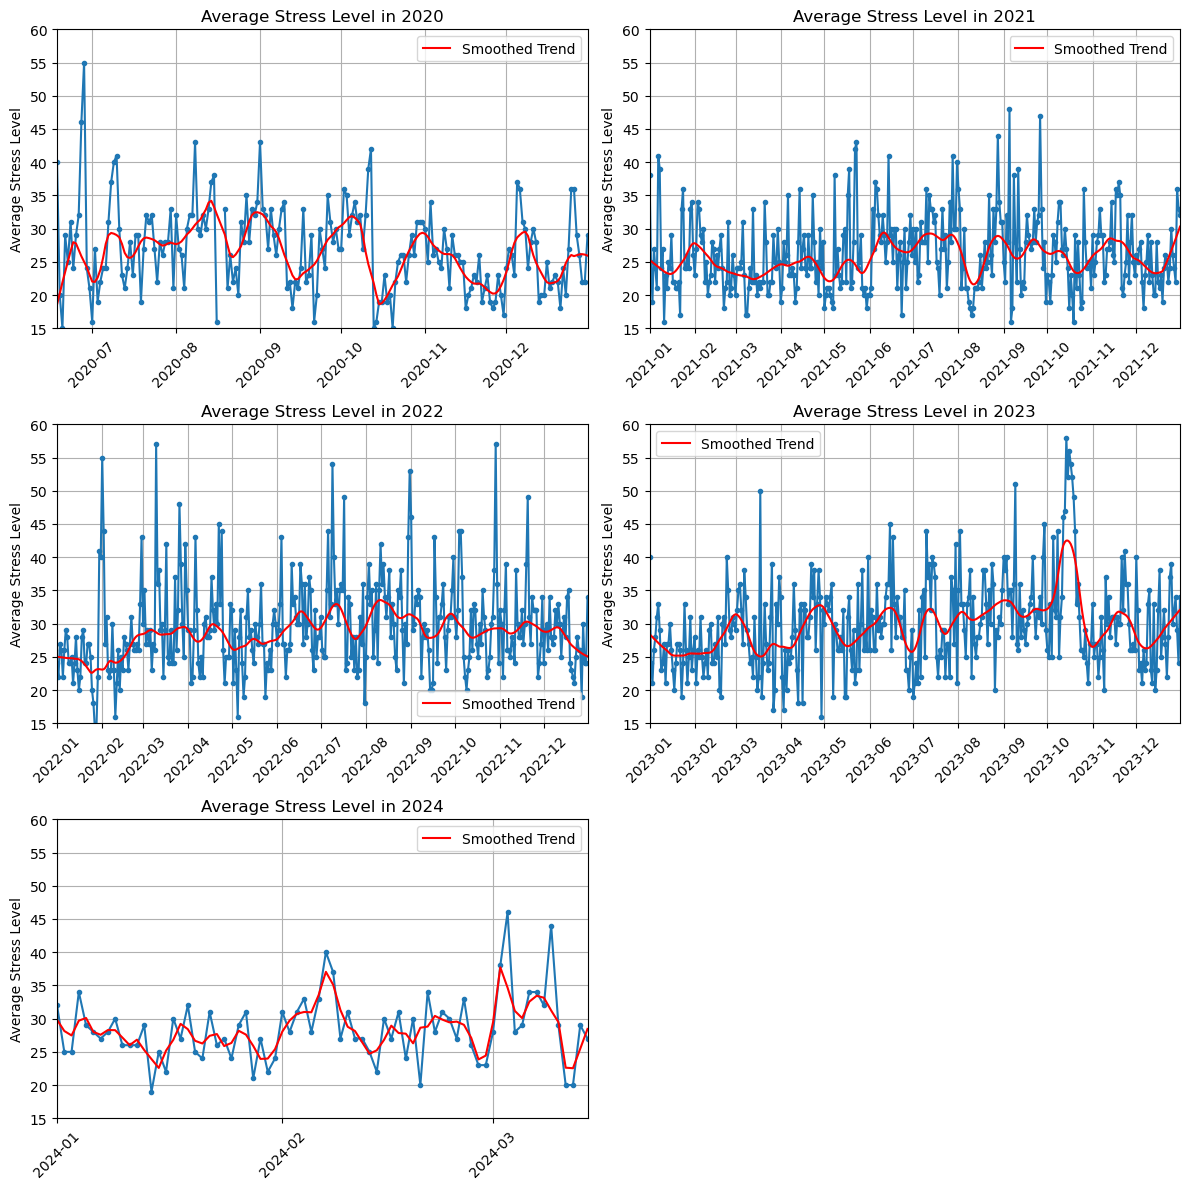

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates  # Import the dates module from matplotlib

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already
focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
rows = (len(years) + 1) // 2
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 4 * rows))
axes = axes.ravel()

# Plot each year's data
for i, year in enumerate(years):
    ax = axes[i]
    year_data = focus_df[focus_df['year'] == year]
    
    # Plot raw data as a line plot
    ax.plot(year_data['calendarDate'], year_data['AverageStressLevel'], marker='.', linestyle='-')
    
    # Ensure that the calendarDate is converted to numeric for lowess smoothing
    numeric_dates = mdates.date2num(year_data['calendarDate'])  # Convert dates to numeric format using matplotlib.dates
    
    # Lowess smoothing
    smoothed = lowess(year_data['AverageStressLevel'], numeric_dates, frac=0.07)
    ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
    
    ax.set_title(f"Average Stress Level in {year}")
    ax.set_ylabel('Average Stress Level')
    ax.grid(True)

    ax.set_xlim([year_data['calendarDate'].min(), year_data['calendarDate'].max()])

    # Set x-axis major locator to month starts and formatter to year-month format
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(15, 60)

    ax.legend()

# Hide any unused subplot axes if the number of plots is odd
if len(years) % 2 != 0:
    axes[-1].axis('off')
    
plt.tight_layout()
plt.show()


## Stress and trend in 2021-2023

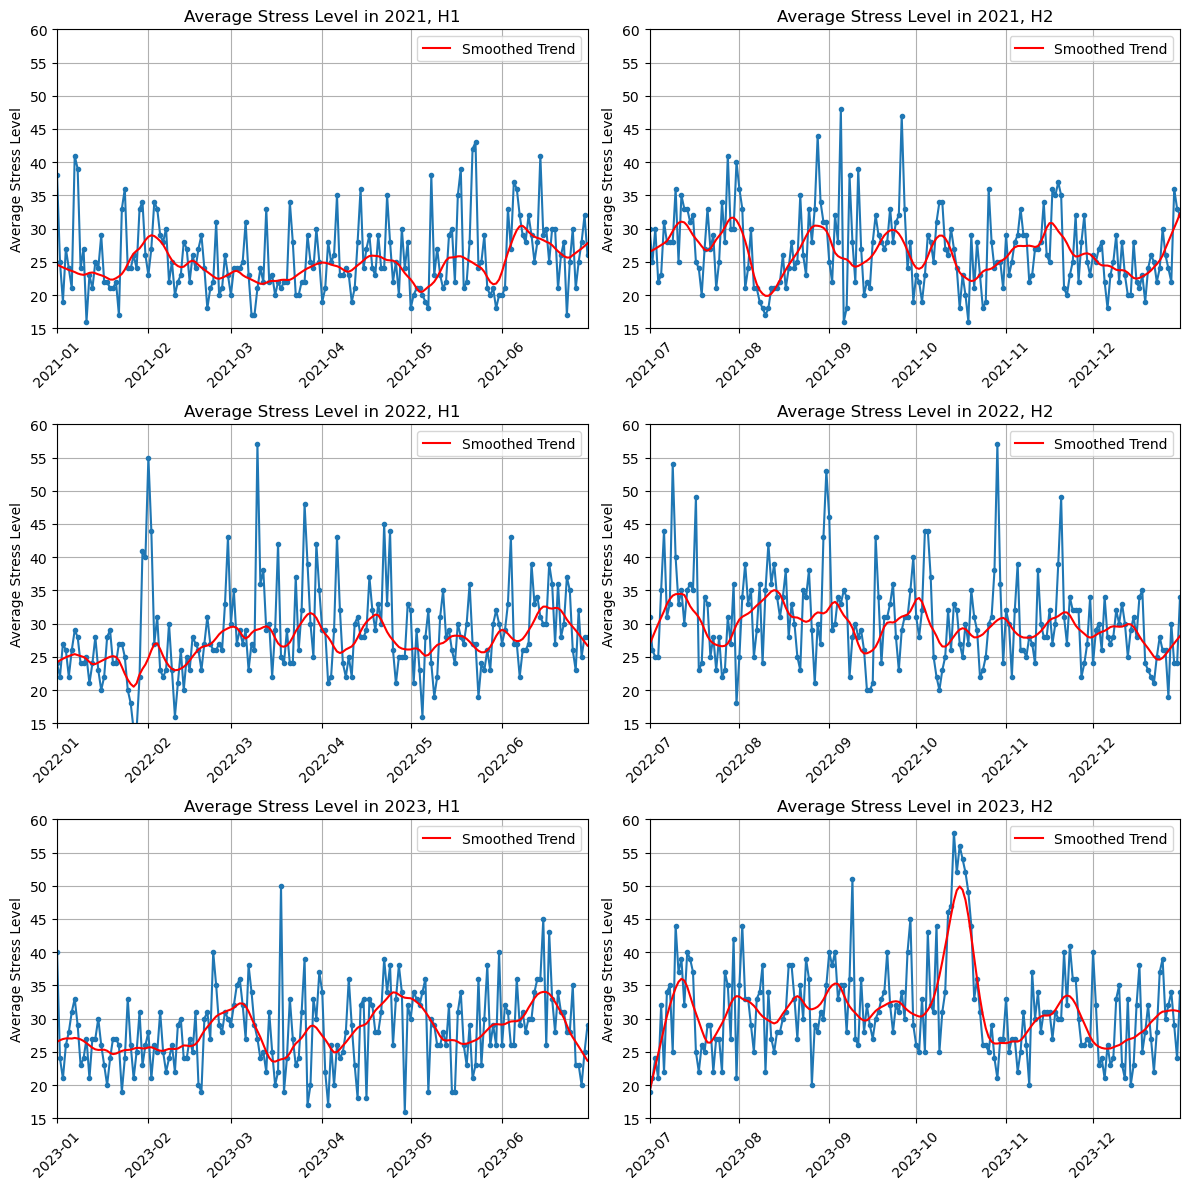

In [177]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
full_years_df = focus_df[(focus_df['calendarDate'] >= '2021-01-01') & (focus_df['calendarDate'] <= '2023-12-31')].copy()

# Now modify using loc to avoid SettingWithCopyWarning
full_years_df.loc[:, 'year'] = full_years_df['calendarDate'].dt.year
full_years_df.loc[:, 'half'] = (full_years_df['calendarDate'].dt.month - 1) // 6 + 1


# Prepare subplots
years = full_years_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = full_years_df[(full_years_df['year'] == year) & (full_years_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['AverageStressLevel'], marker='.', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['AverageStressLevel'], numeric_dates, frac=0.08)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Average Stress Level in {year}, H{half}")
            ax.set_ylabel('Average Stress Level')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)
            ax.set_ylim(15, 60)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()


## Time Series Decompositions
    

## Change Points Detection
    
Change point detection involves identifying points where the statistical properties of a sequence of observations change significantly. This can be particularly useful for spotting when your stress levels shift dramatically, signaling a change in your underlying stress factors.

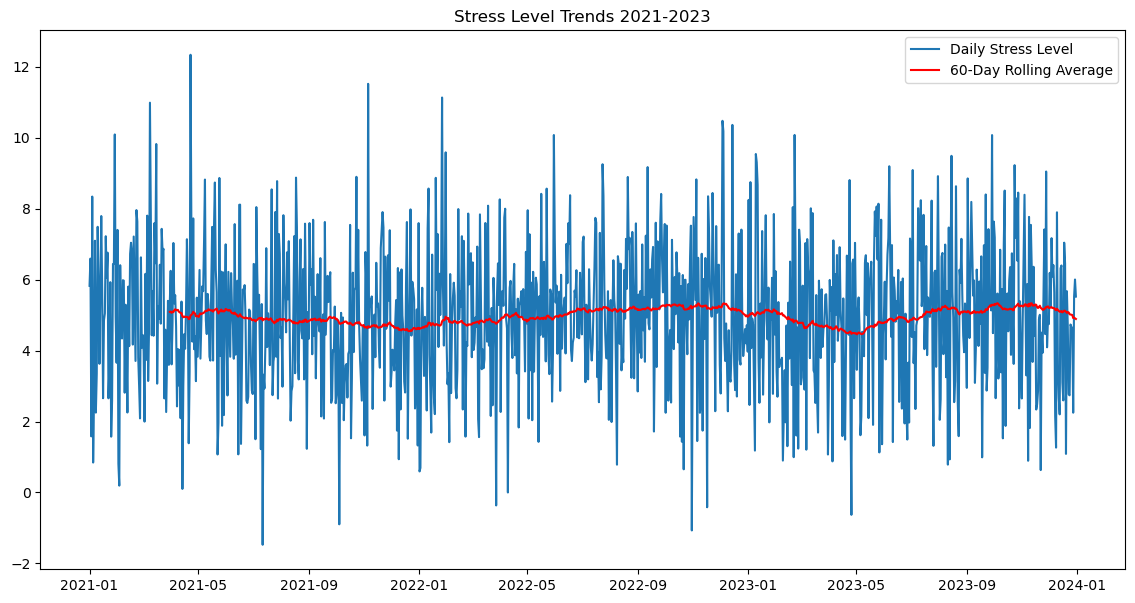

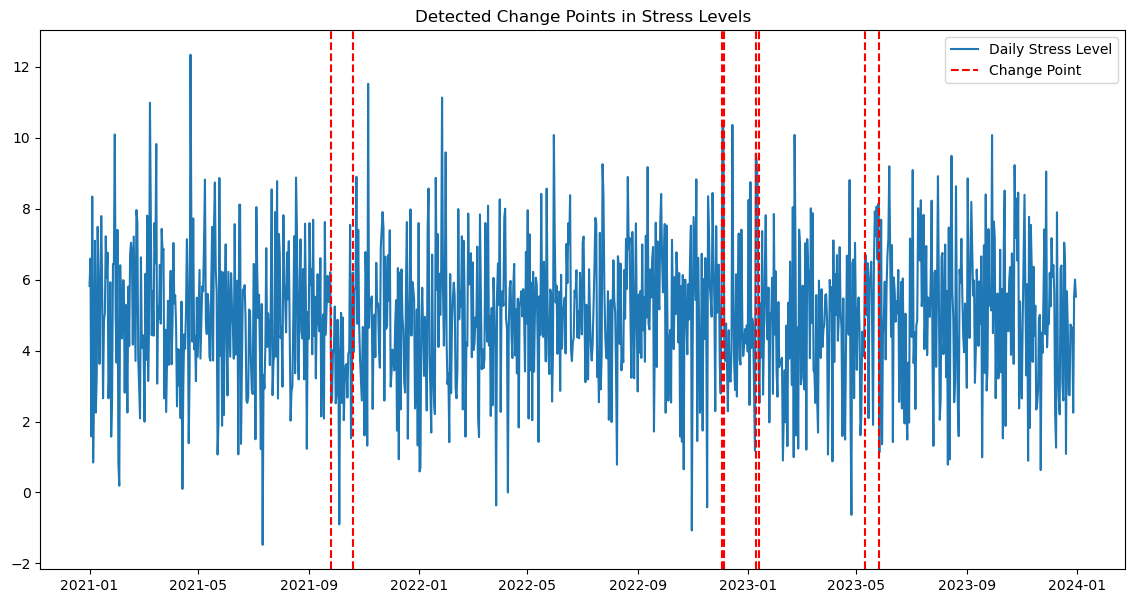

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt  # Correct import for the ruptures package

# Sample DataFrame setup
data = {a
    'Date': pd.date_range(start="2021-01-01", periods=1095, freq='D'),
    'StressLevel': np.random.normal(loc=5, scale=2, size=1095)  # Simulated stress levels
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate a 30-day rolling average
df['RollingMean'] = df['StressLevel'].rolling(window=90).mean()

# Plotting the stress levels and the rolling average
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['StressLevel'], label='Daily Stress Level')
plt.plot(df.index, df['RollingMean'], label='60-Day Rolling Average', color='red')
plt.title('Stress Level Trends 2021-2023')
plt.legend()
plt.show()

# Change point detection using ruptures
model = "l1"  # Using L1 norm
penalty = 7

algo = rpt.Pelt(model=model, min_size=1, jump=1).fit(df['StressLevel'].values)
change_points = algo.predict(pen=penalty)

# Filter out change point that exceeds the length of the DataFrame
change_points = [cp for cp in change_points if cp < len(df)]

# Highlighting change points on the plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['StressLevel'], label='Daily Stress Level')
for cp in change_points:
    plt.axvline(df.index[cp], color='r', linestyle='--', label='Change Point' if cp == change_points[0] else None)
plt.title('Detected Change Points in Stress Levels')
plt.legend()
plt.show()


# Create plots for stress level by semester, weekday, months, 24H

## Checking stress levels for 200+ days of running every day vs before and after

In [162]:
# Convert 'calendarDate' to datetime if it isn't already
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])

# Define the date ranges
date_before = pd.Timestamp('2022-11-21')
date_mid_start = pd.Timestamp('2022-11-21')
date_mid_end = pd.Timestamp('2023-06-17')
date_after = pd.Timestamp('2023-06-17')

# Filter data for each subplot
data_before = focus_df[focus_df['calendarDate'] < date_before]
data_between = focus_df[(focus_df['calendarDate'] >= date_mid_start) & (focus_df['calendarDate'] <= date_mid_end)]
data_after = focus_df[focus_df['calendarDate'] > date_after]


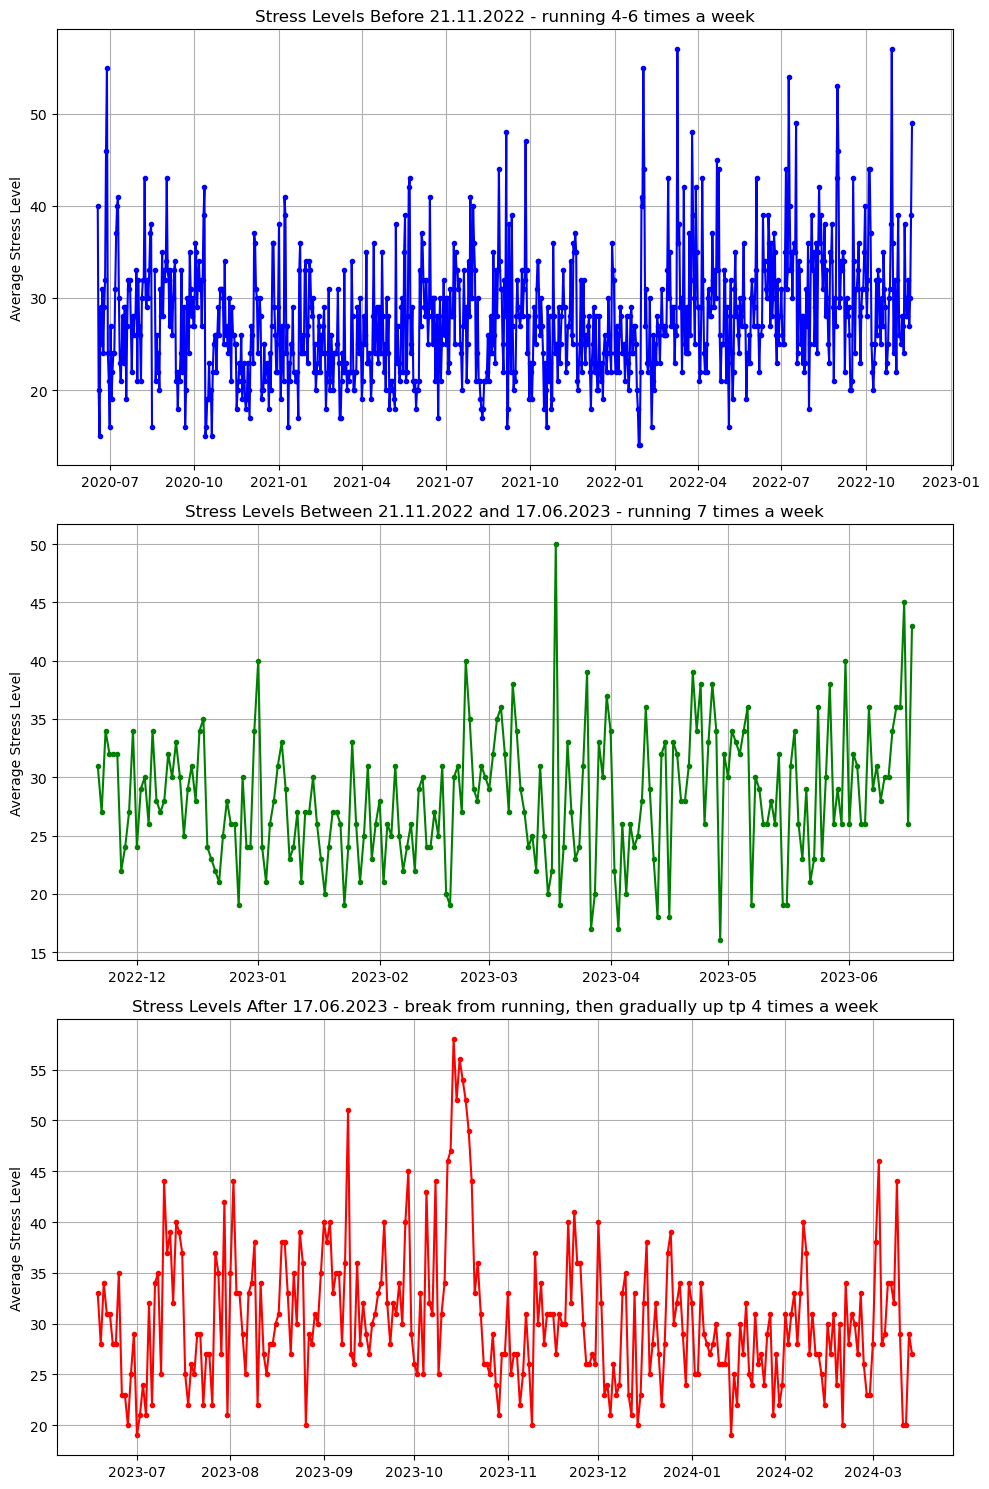

Days before 21.11.2022: 885
Days between 21.11.2022 and 17.06.2023: 209
Days after 17.06.2023: 271


In [170]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 Rows, 1 Column

# Plotting data before 21.11.2022
axs[0].plot(data_before['calendarDate'], data_before['AverageStressLevel'], marker='.', linestyle='-', color='b')
axs[0].set_title('Stress Levels Before 21.11.2022 - running 4-6 times a week')
axs[0].set_ylabel('Average Stress Level')
axs[0].grid(True)

# Plotting data between 21.11.2022 and 17.06.2023
axs[1].plot(data_between['calendarDate'], data_between['AverageStressLevel'], marker='.', linestyle='-', color='g')
axs[1].set_title('Stress Levels Between 21.11.2022 and 17.06.2023 - running 7 times a week')
axs[1].set_ylabel('Average Stress Level')
axs[1].grid(True)

# Plotting data after 17.06.2023
axs[2].plot(data_after['calendarDate'], data_after['AverageStressLevel'], marker='.', linestyle='-', color='r')
axs[2].set_title('Stress Levels After 17.06.2023 - break from running, then gradually up tp 4 times a week')
axs[2].set_ylabel('Average Stress Level')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Define date boundaries
date_before = pd.Timestamp('2022-11-21')
date_mid_end = pd.Timestamp('2023-06-17')

# Count days in each interval
days_before = focus_df[focus_df['calendarDate'] < date_before]['calendarDate'].nunique()
days_between = focus_df[(focus_df['calendarDate'] >= date_before) & (focus_df['calendarDate'] <= date_mid_end)]['calendarDate'].nunique()
days_after = focus_df[focus_df['calendarDate'] > date_mid_end]['calendarDate'].nunique()

print(f"Days before 21.11.2022: {days_before}")
print(f"Days between 21.11.2022 and 17.06.2023: {days_between}")
print(f"Days after 17.06.2023: {days_after}")


## Consider semesters ...

In [167]:
def assign_phase(date):
    if date.month == 1:
        return 'Winter'
    elif 2 <= date.month <= 5:
        return '1st Semester'
    elif 7 <= date.month <= 8:
        return 'Summer'
    elif 9 <= date.month <= 12:
        return '2nd Semester'
    return 'Break'

full_years_df['WorkPhase'] = full_years_df['calendarDate'].apply(assign_phase)


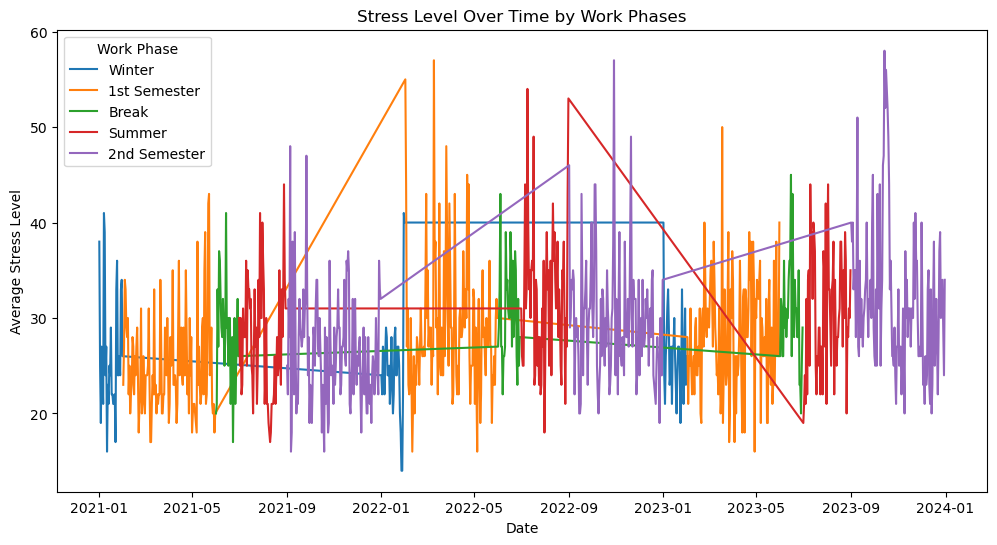

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=full_years_df, x='calendarDate', y='AverageStressLevel', hue='WorkPhase')
plt.title('Stress Level Over Time by Work Phases')
plt.xlabel('Date')
plt.ylabel('Average Stress Level')
plt.legend(title='Work Phase')
plt.show()


## Playground of quantitative analysis

In [164]:
stress_df = full_years_df[['allDayStress']]



# Creating an empty list to hold the normalized DataFrames
df_expanded_list = []

# Iterate through each row in the DataFrame
for idx, row in stress_df.iterrows():
    # Normalize the main level and the 'aggregatorList'
    temp_df = pd.json_normalize(row['allDayStress'], record_path='aggregatorList', 
                                meta=['userProfilePK', 'calendarDate'])
    # Append each expanded DataFrame to the list
    df_expanded_list.append(temp_df)

# Concatenate all DataFrames in the list into a single DataFrame
expanded_df = pd.concat(df_expanded_list, ignore_index=True)

# Convert 'calendarDate' to datetime format for easier analysis later on
expanded_df['calendarDate'] = pd.to_datetime(expanded_df['calendarDate'])

# Check the first few rows to ensure everything looks correct
print(expanded_df.head())


     type  averageStressLevel  averageStressLevelIntensity  maxStressLevel  \
0   TOTAL                  38                           32            95.0   
1   AWAKE                  38                           33            95.0   
2  ASLEEP                  39                           31            78.0   
3   TOTAL                  25                           21            95.0   
4   AWAKE                  38                           34            95.0   

   stressIntensityCount  stressOffWristCount  stressTooActiveCount  \
0                1037.0                 90.0                 310.0   
1                 549.0                 71.0                 301.0   
2                 488.0                 19.0                   9.0   
3                 814.0                119.0                 478.0   
4                 427.0                116.0                 477.0   

   totalStressCount  totalStressIntensity  stressDuration  restDuration  \
0            1437.0              -1

## Anomaly Detection
For anomaly detection, you can use various statistical methods or machine learning models. A simple and effective approach is using the Interquartile Range (IQR) method, which identifies outliers based on quartiles.

IQR-based Anomaly Detection
Calculate the IQR (the difference between the 75th and 25th percentiles).
Identify outliers as those points that fall below 
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR or above 
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR.

In [43]:
# Assuming df is your DataFrame with a 'StressLevel' column
Q1 = df['StressLevel'].quantile(0.25)
Q3 = df['StressLevel'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = df[(df['StressLevel'] < (Q1 - 1.5 * IQR)) | (df['StressLevel'] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR:")
print(outliers)


Outliers based on IQR:
            StressLevel  RollingMean  Time
Date                                      
2021-02-02    -1.035360          NaN    32
2021-06-09    10.551378     5.030602   159
2022-02-09    -2.061508     4.945765   404
2022-07-18    -1.521292     4.871496   563
2022-12-02    -0.704800     4.885995   700
2023-08-30    10.784089     4.524850   971
2023-11-13    -1.145404     5.102340  1046


### Statistical Analysis for Trends
For numerical statistical analysis to understand trends in your stress levels, you can use techniques such as:

Linear Regression: To see if there is a statistically significant trend over time.
Seasonal Decomposition: To extract and analyze trends, seasonality, and residuals.
